Tutorial: Finding Motif among multiple time series

https://github.com/TDAmeritrade/stumpy/blob/main/docs/Tutorial_Consensus_Motif.ipynb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries & Packages

In [ ]:
pip install stumpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 136 kB 15.2 MB/s 


In [ ]:
import stumpy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
import os
from tqdm.auto import tqdm
from sklearn import decomposition

import scipy.stats as sc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve

from sklearn.ensemble import RandomForestClassifier

In [ ]:
%matplotlib inlineimport stumpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle, combinations
from matplotlib.patches import Rectangle
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.special import comb
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['xtick.direction'] = 'out'

## Downloading Data

In [ ]:
# path of original data folder
csvD_path = "/content/drive/MyDrive/Thesis/3rd_semester/Data/csv_files"

In [ ]:
# lists for the files' names for the two cases : Parkinson's D and Control data
files_co = []
files_pt = []

# Getting the files names for PD and control
for name in os.listdir(csvD_path):
    if 'Co' in name:
        files_co.append(csvD_path+'/' + name)
    elif 'Pt' in name:
        files_pt.append(csvD_path+'/' + name)


The columns: 
Time	L1	L2	L3	L4	L5	L6	L7	L8	R1	R2	R3	R4	R5	R6	R7	R8	Total_Force_Left	Total_Force_Right

## Finding the motif for L2 feature for the first 50 value of 12000 row for each participant

In [ ]:
# L2 features
list_pt = [None] * len(files_pt)
for i, s in enumerate(files_pt):
    list_pt[i] = pd.read_csv(s).iloc[:50, 2].values # 50 out of 12000

In [ ]:
m = 15 #supposing the motif size would be around 15
radius, Ts_idx, subseq_idx = stumpy.ostinato(list_pt, m)

In [ ]:
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 3.87 in time series 3 starting at subsequence index location 0.


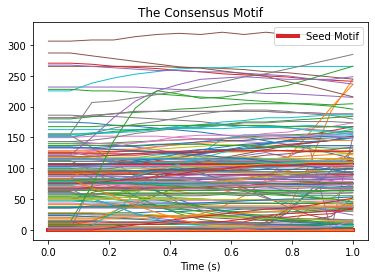

In [ ]:
import matplotlib.pyplot as plt
seed_motif = list_pt[Ts_idx][subseq_idx : subseq_idx + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(list_pt), dtype=np.int64)
nn[Ts_idx] = subseq_idx
for i, e in enumerate(list_pt):
    if i != Ts_idx:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 

## Finding the motif for Total_Force_Left feature for the first 50 value of 12000 row for each participant

In [ ]:
# Total_Force_Left features
list_pt = [None] * len(files_pt)
for i, s in enumerate(files_pt):
    list_pt[i] = pd.read_csv(s).iloc[:50, 17].values # 50 out of 12000


In [ ]:
m = 15 #supposing the motif size would be around 15
radius, Ts_idx, subseq_idx = stumpy.ostinato(list_pt, m)

In [ ]:
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 3.87 in time series 3 starting at subsequence index location 5.


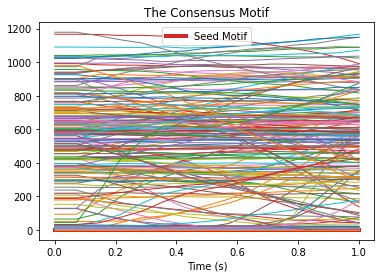

In [ ]:
import matplotlib.pyplot as plt
seed_motif = list_pt[Ts_idx][subseq_idx : subseq_idx + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(list_pt), dtype=np.int64)
nn[Ts_idx] = subseq_idx
for i, e in enumerate(list_pt):
    if i != Ts_idx:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 

## Finding the motif for Total_Force_Left feature for the whole series (12,000 values) for each participant with parkinson's disease

In [ ]:
# Total_Force_Left features
list_pt = [None] * len(files_pt)
for i, s in enumerate(files_pt):
    list_pt[i] = pd.read_csv(s).iloc[:, 17].values 

In [ ]:
m = 100 #supposing the motif size would be around 15
radius, Ts_idx, subseq_idx = stumpy.ostinato(list_pt, m)

In [ ]:
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 1.6 in time series 204 starting at subsequence index location 7227.


In [ ]:
list_pt[204][7227:7327]

array([ 830.06,  847.11,  861.96,  881.54,  895.18,  902.55,  916.63,
        926.42,  936.43,  946.11,  959.53,  961.95,  964.15,  962.06,
        966.57,  964.37,  964.59,  953.59,  953.7 ,  949.41,  947.43,
        949.85,  956.67,  970.09,  980.98,  996.38, 1000.67, 1011.56,
       1020.36, 1020.03, 1013.43, 1002.32,  991.21,  982.85,  972.18,
        966.02,  960.19,  958.87,  960.74,  957.88,  965.91,  959.97,
        949.74,  936.76,  913.33,  885.39,  847.33,  803.22,  764.39,
        713.02,  645.92,  590.92,  544.5 ,  510.4 ,  465.63,  422.62,
        375.1 ,  332.09,  282.15,  222.42,  172.15,  130.9 ,   79.75,
         44.  ,   30.91,   19.8 ,   13.09,   11.  ,   11.  ,   11.  ,
          8.8 ,    8.8 ,    8.8 ,    8.8 ,    8.8 ,    4.51,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    4.51,    4.51,   24.53,   33.33,   24.31,
         17.6 ,   17.49,   17.49,   19.47,   15.18,   18.26,   19.47,
         21.12,   13

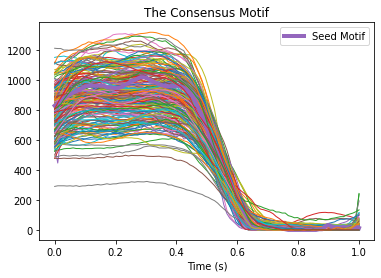

In [ ]:
import matplotlib.pyplot as plt
seed_motif = list_pt[Ts_idx][subseq_idx : subseq_idx + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(list_pt), dtype=np.int64)
nn[Ts_idx] = subseq_idx
for i, e in enumerate(list_pt):
    if i != Ts_idx:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 

## Finding the motif for Total_Force_right feature for the whole series (12,000 values) for each participant with parkinson's disease

In [ ]:
# Total_Force_right features
list_pt_18 = [None] * len(files_pt)
for i, s in enumerate(files_pt):
    list_pt_18[i] = pd.read_csv(s).iloc[:, 18].values 

In [ ]:
m = 100 #supposing the motif size would be around 15
radius_18, Ts_idx_18, subseq_idx_18 = stumpy.ostinato(list_pt_18, m)

In [ ]:
print(f'Found Best Radius {np.round(radius_18, 2)} in time series {Ts_idx_18} starting at subsequence index location {subseq_idx_18}.')

Found Best Radius 1.64 in time series 40 starting at subsequence index location 7834.


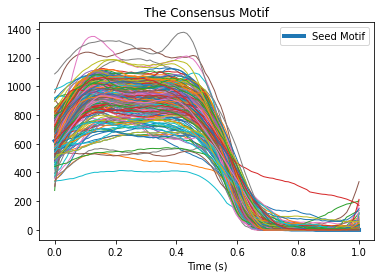

In [ ]:
import matplotlib.pyplot as plt
seed_motif_18 = list_pt_18[Ts_idx_18][subseq_idx_18 : subseq_idx_18 + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(list_pt_18), dtype=np.int64)
nn[Ts_idx_18] = subseq_idx_18
for i, e in enumerate(list_pt_18):
    if i != Ts_idx_18:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif_18, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 

## Finding the motif for Total_Force_left feature for the whole series (12,000 values) for each participant from control group

In [ ]:
# Total_Force_left features
list_pt_17_co = [None] * len(files_co)
for i, s in enumerate(files_co):
    list_pt_17_co[i] = pd.read_csv(s).iloc[:, 17].values 

In [ ]:
m = 100 #supposing the motif size would be around 15
radius_17_co, Ts_idx_17_co, subseq_idx_17_co = stumpy.ostinato(list_pt_17_co, m)

In [ ]:
print(f'Found Best Radius {np.round(radius_17_co, 2)} in time series {Ts_idx_17_co} starting at subsequence index location {subseq_idx_17_co}.')

Found Best Radius 1.46 in time series 7 starting at subsequence index location 5521.


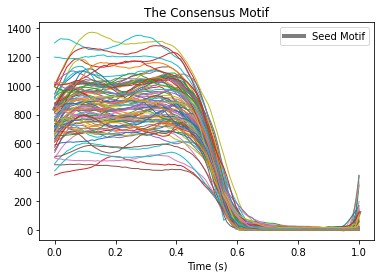

In [ ]:
import matplotlib.pyplot as plt
seed_motif_17_co = list_pt_17_co[Ts_idx_17_co][subseq_idx_17_co : subseq_idx_17_co + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(list_pt_17_co), dtype=np.int64)
nn[Ts_idx_17_co] = subseq_idx_17_co
for i, e in enumerate(list_pt_17_co):
    if i != Ts_idx_17_co:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif_17_co, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 

## Finding the motif for Total_Force_right feature for the whole series (12,000 values) for each participant from control group

In [ ]:
# Total_Force_right features
list_pt_18_co = [None] * len(files_co)
for i, s in enumerate(files_co):
    list_pt_18_co[i] = pd.read_csv(s).iloc[:, 18].values 

In [ ]:
m = 100 #supposing the motif size would be around 15
radius_18_co, Ts_idx_18_co, subseq_idx_18_co = stumpy.ostinato(list_pt_18_co, m)

In [ ]:
print(f'Found Best Radius {np.round(radius_18_co, 2)} in time series {Ts_idx_18_co} starting at subsequence index location {subseq_idx_18_co}.')

Found Best Radius 1.25 in time series 3 starting at subsequence index location 4378.


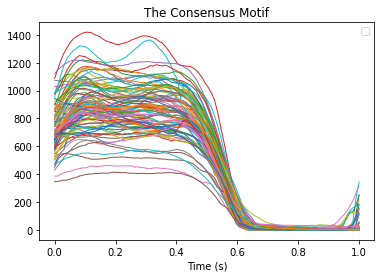

In [ ]:
import matplotlib.pyplot as plt
seed_motif_18_co = list_pt_18_co[Ts_idx_18_co][subseq_idx_18_co : subseq_idx_18_co + m]
x = np.linspace(0,1,m)
nn = np.zeros(len(list_pt_18_co), dtype=np.int64)
nn[Ts_idx_18_co] = subseq_idx_18_co
for i, e in enumerate(list_pt_18_co):
    if i != Ts_idx:
        nn[i] = np.argmin(stumpy.core.mass(seed_motif_18_co, e))
        lw = 1
        label = None
    else:
        lw = 4
        label = 'Seed Motif'
    plt.plot(x, e[nn[i]:nn[i]+m], lw=lw, label=label)
plt.title('The Consensus Motif')
plt.xlabel('Time (s)')
plt.legend()
plt.show() 